<a href="https://colab.research.google.com/github/yohangumiel/Aulas-PUC-PR/blob/main/Computacao-Natural/Computa%C3%A7%C3%A3o_Natural_V%C3%ADdeo_aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits to WIRSANKY et al (2020)

WIRSANSKY, Eyal. Hands-on genetic algorithms with Python: applying genetic algorithms to solve real-world deep learning and artificial intelligence problems. Packt Publishing Ltd, 2020.

Original codes: https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter04/knapsack.py

https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter04/01-solve-knapsack.py





In [ ]:
!pip install deap

     |████████████████████████████████| 160 kB 34.6 MB/s 


In [ ]:

import numpy as np

class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
       Developed by https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter04/knapsack.py
       Translated to portuguese by Yohan Gumiel
    """

    def __init__(self):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("mapa", 9, 150),
            ("compasso", 13, 35),
            ("agua", 153, 200),
            ("sanduiche", 50, 160),
            ("glicose", 15, 60),
            ("lata", 68, 45),
            ("banana", 27, 60),
            ("maça", 39, 40),
            ("queijo", 23, 30),
            ("cerveja", 52, 10),
            ("proteção solar", 11, 70),
            ("camera", 32, 30),
            ("camisa", 24, 15),
            ("calças", 48, 10),
            ("guarda-chuva", 73, 40),
            ("calças a prova d'agua", 42, 70),
            ("roupas a prova d'agua", 43, 75),
            ("carteira", 22, 80),
            ("oculos de sol", 7, 20),
            ("toalha", 18, 12),
            ("meias", 4, 50),
            ("livro", 30, 10)
        ]

        self.maxCapacity = 400

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adicionando {}: peso = {}, valor = {}, peso acumuculado = {}, valor acumulado = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Peso total = {}, Valor total = {}".format(totalWeight, totalValue))


# testing the class:
def main():
    # create a problem instance:
    knapsack = Knapsack01Problem()

    # creaete a random solution and evaluate it:
    randomSolution = np.random.randint(2, size=len(knapsack))
    print("Solução aleatória = ")
    print(randomSolution)
    knapsack.printItems(randomSolution)


if __name__ == "__main__":
    main()

Solução aleatória = 
[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0]
- Adicionando lata: peso = 68, valor = 45, peso acumuculado = 68, valor acumulado = 45
- Adicionando maça: peso = 39, valor = 40, peso acumuculado = 107, valor acumulado = 85
- Adicionando camisa: peso = 24, valor = 15, peso acumuculado = 131, valor acumulado = 100
- Adicionando calças: peso = 48, valor = 10, peso acumuculado = 179, valor acumulado = 110
- Adicionando calças a prova d'agua: peso = 42, valor = 70, peso acumuculado = 221, valor acumulado = 180
- Adicionando roupas a prova d'agua: peso = 43, valor = 75, peso acumuculado = 264, valor acumulado = 255
- Adicionando carteira: peso = 22, valor = 80, peso acumuculado = 286, valor acumulado = 335
- Adicionando oculos de sol: peso = 7, valor = 20, peso acumuculado = 293, valor acumulado = 355
- Adicionando toalha: peso = 18, valor = 12, peso acumuculado = 311, valor acumulado = 367
- Adicionando meias: peso = 4, valor = 50, peso acumuculado = 315, valor acumulado 

## PARAMETROS DE ENTRADA

In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
knapsack = Knapsack01Problem()

LENGTH = len(knapsack)  # tamanho do vetor a ser otimizado (tamanho 22)

POPULATION_SIZE = 200 # tamanho da população
P_CROSSOVER = 0.9  # probabilidade de um crossover
P_MUTATION = 0.1   # probabilidade de uma mutação
MAX_GENERATIONS = 50 # número máximo de gerações (quantidade de ciclos do algoritmo)
HALL_OF_FAME_SIZE = 1 # mantém a melhor solução encontrada, mesmo se acabar sendo perdida durante as gerações 


RANDOM_SEED = 42 # para replicabilidade
random.seed(RANDOM_SEED)

## FUNÇÕES

https://deap.readthedocs.io/en/master/tutorials/basic/part1.html

Vetor de 22 elementos com valores entre 0 e 1:
 [0, 1, 0, 1, ........., 1]

## Fitness

In [ ]:
# define que teremos uma única função objetivo, maximizando o fitness


creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# exemplo de minimização do fitness
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

### Indivíduos

In [ ]:
# o indivíduo é composto de uma lista, herdando do tipo de dado LISTA, tendo um atributo de fitness

creator.create("Individual", list, fitness = creator.FitnessMax)

In [ ]:
toolbox = base.Toolbox()

# são criadas duas funções/comandos na toolbox "zeroOrOne" e "individualCreator"

# operador que retorna 0 ou 1, é usado para criar a população
toolbox.register("zeroOrOne", random.randint, 0, 1) # random.randint(0,1)

# operador que preenche os dados do indivíduo
# initRepeat() - chama a função N vezes e retorna o resultado em um container do tipo container

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, LENGTH) # LENGTH

### População

In [ ]:
# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)



In [ ]:
toolbox.populationCreator(n=2)

[[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]]

In [ ]:
len(toolbox.populationCreator(n=2))

2

In [ ]:
len(toolbox.populationCreator(n=2)[0])

22

### Função de fitness

In [ ]:
# soma todos os valores dos vetores (valor máximo da soma igual a 100)
#def oneMaxFitness(individual):
#    return sum(individual),

# calculo do fitness
def knapsackValue(individual):
    return knapsack.getValue(individual),

In [ ]:

toolbox.register("evaluate", knapsackValue) # indicando a operador para avaliação

### Operadores Genéticos

In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3) # seleção por torneio

toolbox.register("mate", tools.cxOnePoint) # cruzamento de um ponto único

# mutação por rotação de bit, com a probabilidade de mudança de cada atributo sendo definida por indpd

toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/LENGTH) # LENGTH

# documentação: os nomes usuais para ferramentas evolucionárias são mate(), mutate(), evaluate() e select ()


## ALGORITMO

In [ ]:
# cria uma população inicial (geração 0)
population = toolbox.populationCreator(n=POPULATION_SIZE)

# seleciona quais estatísticas necessitamos
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# cria o objeto do hall da fama:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# roda o algoritmo genético
population, logbook = algorithms.eaSimple(population, toolbox, cxpb= P_CROSSOVER, mutpb= P_MUTATION, ngen= MAX_GENERATIONS, 
                                          stats= stats, halloffame = hof, verbose= True) # mudança no hof


gen	nevals	max	avg    
0  	200   	895	573.125
1  	186   	895	688.865
2  	177   	895	763.7  
3  	170   	950	806.115
4  	190   	970	831.53 
5  	180   	970	842.775
6  	176   	1000	863.225
7  	183   	1000	889.745
8  	180   	1000	913.67 
9  	190   	1002	931.965
10 	185   	1002	946.085
11 	176   	1002	957.405
12 	179   	1005	965.37 
13 	194   	1005	977.5  
14 	184   	1005	986.64 
15 	172   	1005	988.015
16 	191   	1005	991.33 
17 	191   	1005	993.065
18 	179   	1002	998.47 
19 	173   	1002	995.745
20 	177   	1002	997.87 
21 	181   	1002	996.265
22 	175   	1002	996.17 
23 	182   	1002	995.985
24 	187   	1002	999.355
25 	198   	1005	994.87 
26 	182   	1002	991.365
27 	182   	1002	997.355
28 	188   	1002	998.035
29 	184   	1002	995.85 
30 	181   	1002	997.775
31 	181   	1002	994.28 
32 	185   	1002	998.02 
33 	174   	1002	995.16 
34 	177   	1002	996.155
35 	186   	1002	994.12 
36 	175   	1002	996.775
37 	186   	1002	997.245
38 	182   	1002	997.33 
39 	189   	1002	995.875
40 	180   	1002	997.345

### MELHOR SOLUÇÃO

In [ ]:

best = hof.items[0]
print("-- Melhor resultado individual = ", best)
print("-- Melhor fitness = ", best.fitness.values[0])

-- Melhor resultado individual =  [1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
-- Melhor fitness =  1005.0


In [ ]:
print("-- Knapsack Items = ")
knapsack.printItems(best)

-- Knapsack Items = 
- Adicionando mapa: peso = 9, valor = 150, peso acumuculado = 9, valor acumulado = 150
- Adicionando agua: peso = 153, valor = 200, peso acumuculado = 162, valor acumulado = 350
- Adicionando sanduiche: peso = 50, valor = 160, peso acumuculado = 212, valor acumulado = 510
- Adicionando glicose: peso = 15, valor = 60, peso acumuculado = 227, valor acumulado = 570
- Adicionando banana: peso = 27, valor = 60, peso acumuculado = 254, valor acumulado = 630
- Adicionando queijo: peso = 23, valor = 30, peso acumuculado = 277, valor acumulado = 660
- Adicionando proteção solar: peso = 11, valor = 70, peso acumuculado = 288, valor acumulado = 730
- Adicionando calças a prova d'agua: peso = 42, valor = 70, peso acumuculado = 330, valor acumulado = 800
- Adicionando roupas a prova d'agua: peso = 43, valor = 75, peso acumuculado = 373, valor acumulado = 875
- Adicionando carteira: peso = 22, valor = 80, peso acumuculado = 395, valor acumulado = 955
- Adicionando meias: peso = 

## ESTATÍSTICAS

In [ ]:
# estatísticas
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

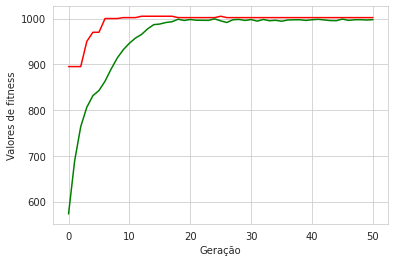

In [ ]:
# gráfico:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Geração')
plt.ylabel('Valores de fitness')
plt.show()